# Titanic_Survival_Prediction:-

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [52]:
tt=pd.read_csv('titanic_train.csv')
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
tt.shape

(891, 12)

# Data Cleaning:-

In [22]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Above observations shows that columns 'Age','Cabin'
# and 'Embarked' are having null values.

In [23]:
tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Above observations shows that 'Name','Sex','Ticket'
# 'Cabin' and 'Embarked' are object type and rest are
# integer and float type.

In [24]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA:-

In [53]:
def missingdata(data):
    total = tt.isnull().sum().sort_values(ascending = False)
    percent = (tt.isnull().sum()/tt.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


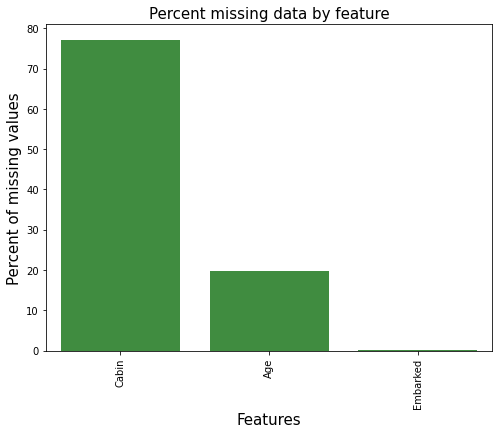

In [54]:
# Identifying the missing data;

missingdata(tt)

In [55]:
tt['Embarked'].fillna(tt['Embarked'].mode()[0], inplace = True)

In [56]:
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
#  Cabin has 75% of the missing data, so we remove that;

drop_column = ['Cabin']
tt.drop(drop_column, axis=1, inplace = True)

In [58]:
tt['Age'].fillna(tt['Age'].median(), inplace = True)

In [59]:
tt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Therefore,we have filled the missing data.

In [32]:
tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [60]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [61]:
le=LabelEncoder()

val=['Name','Sex','Ticket','Embarked']
for i in val:
    tt[i]=le.fit_transform(tt[i])

In [35]:
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,0


In [41]:
#Get a count of the number of survivors 

tt['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

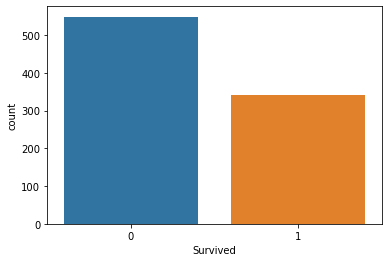

In [43]:
#Visualize the count of number of survivors

sns.countplot(tt['Survived'],label="Count")
plt.show()

In [ ]:
# Above shows the chart of number of survivors (1) 
# and non-survivors (0).

In [45]:
tt.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [ ]:
# From the table above, we can see that about 74.2% of 
# females(0) survived and about 18.89% of males(0) survived.

In [46]:
tt.pivot_table('Survived', index='Sex', columns='Pclass')


Pclass,1,2,3
Sex,,,
0,0.968085,0.921053,0.500000
1,0.368852,0.157407,0.135447


In [ ]:
#From the pivot table above, we see that females(0) in first 
# class had a survival rate of about 96.8%, meaning the 
# majority of them survived.

# Males(1) in third class had the lowest survival rate at 
# about 13.54%, meaning the majority of them did not survive.

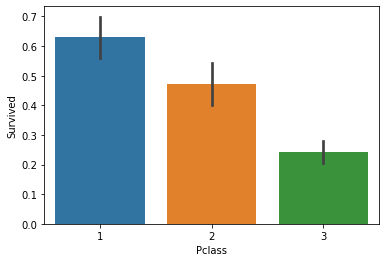

In [47]:
sns.barplot(x='Pclass', y='Survived', data=tt)
plt.show()

In [ ]:
# A little over 60% of the passengers in first class survived. 
# Less than 30% of passengers in third class survived. That means 
# less than half of the passengers in third class survived, 
# compared to the passengers in first class.

# Correlation:-

In [48]:
# Checking the Correlation with respect to target variable(Survived):-

tt.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Ticket        -0.164549
Age           -0.064910
Name          -0.057343
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

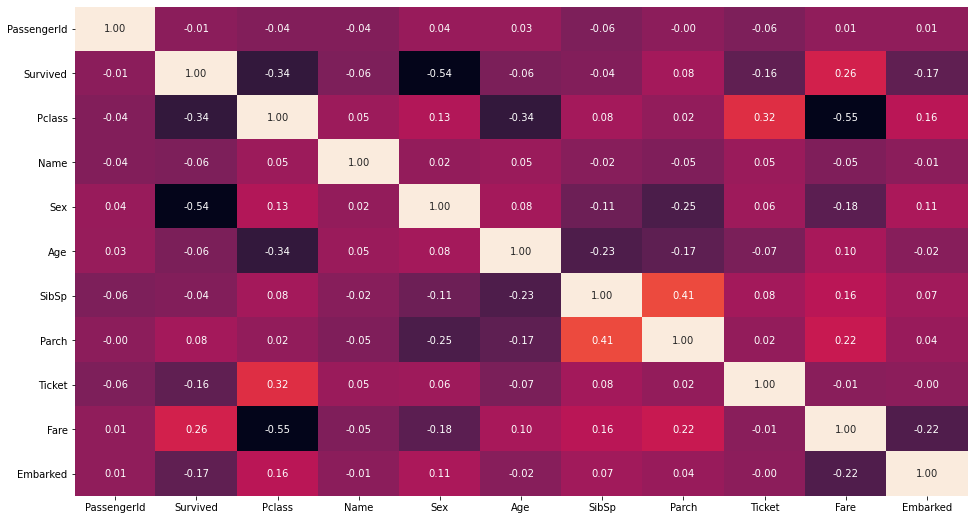

In [49]:
plt.figure(figsize=(16,9))
sns.heatmap(tt.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

In [ ]:
# Above correlation shows that 'PassengerId','Ticket'
# and 'Name' are less correlated with the output variable.

In [62]:
# Drop the less correlalted/non-relevant columns;

tt1=tt.drop(['PassengerId','Ticket','Name'],axis=1)
tt1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [63]:
tt.shape

(891, 11)

In [64]:
tt1.shape

(891, 8)

# Checking for the Skewness:-

In [65]:
tt1.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [ ]:
# Above data shows that 'Pclass','SibSp',
#'Parch', and 'Fare'
# are highly skewed.

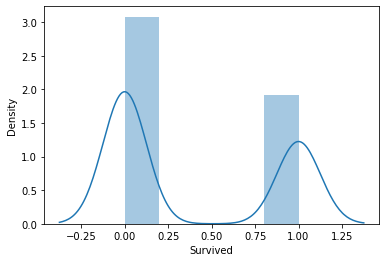

In [75]:
# checking with the distribution curve:-

sns.distplot(tt1['Survived'])
plt.show()

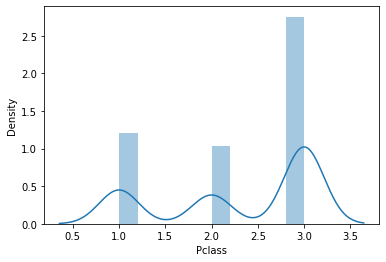

In [76]:
sns.distplot(tt1['Pclass'])
plt.show()

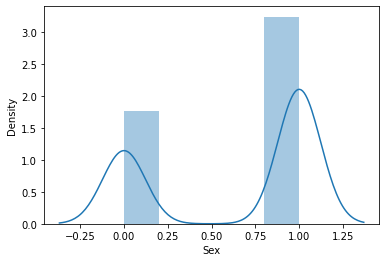

In [77]:
sns.distplot(tt1['Sex'])
plt.show()

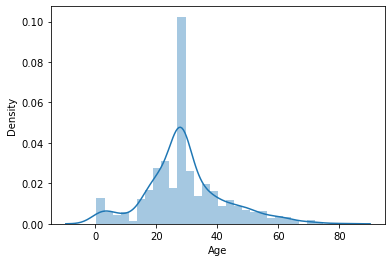

In [78]:
sns.distplot(tt1['Age'])
plt.show()

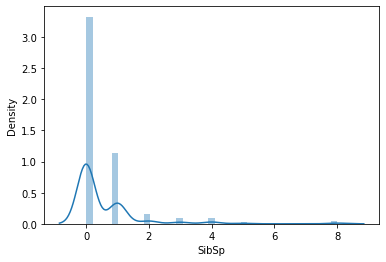

In [79]:
sns.distplot(tt1['SibSp'])
plt.show()

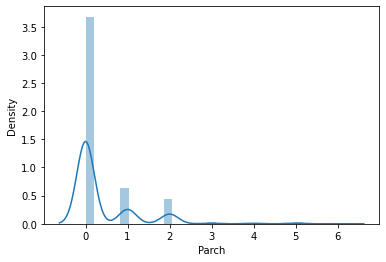

In [80]:
sns.distplot(tt1['Parch'])
plt.show()

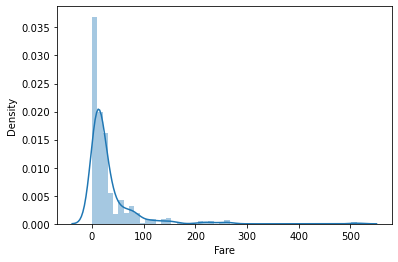

In [81]:
sns.distplot(tt1['Fare'])
plt.show()

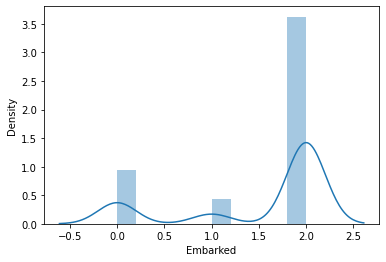

In [82]:
sns.distplot(tt1['Embarked'])
plt.show()

In [ ]:
#Above visualizations shows that the is not normalized.
#The building blocks is out of normalized curve.

# Outliers Removal:-

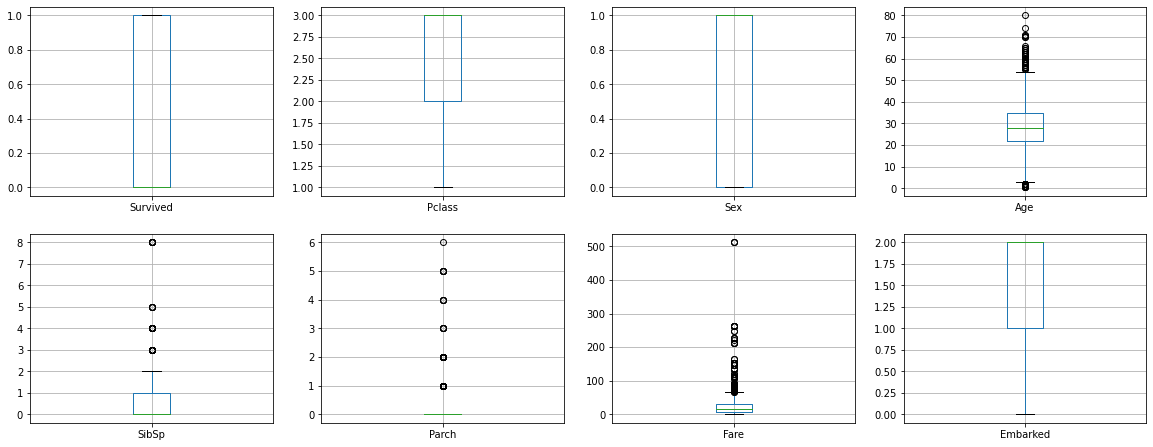

In [83]:
tt1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(tt1))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [85]:
# index no.

np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [86]:
tt1_new=tt1[(z<3).all(axis=1)]
tt1_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [87]:
tt1.shape

(891, 8)

In [88]:
tt1_new.shape

(820, 8)

In [89]:
# percentage data loss:-

loss_percent=(891-820)/(891*100)
print(loss_percent,'%')

0.0007968574635241302 %


In [90]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(tt1,method='yeo-johnson')
X

array([[-0.78927234,  0.86397329,  0.73769513, ..., -0.56025296,
        -0.87882001,  0.61041095],
       [ 1.2669898 , -1.45912855, -1.35557354, ..., -0.56025296,
         1.33665056, -1.78052001],
       [ 1.2669898 ,  0.86397329, -1.35557354, ..., -0.56025296,
        -0.79006485,  0.61041095],
       ...,
       [-0.78927234,  0.86397329, -1.35557354, ...,  1.84685634,
         0.28888536,  0.61041095],
       [ 1.2669898 , -1.45912855,  0.73769513, ..., -0.56025296,
         0.52790578, -1.78052001],
       [-0.78927234,  0.86397329,  0.73769513, ..., -0.56025296,
        -0.81234947, -1.23633916]])

In [91]:
X.ndim

2

In [92]:
X.std()

1.0

In [93]:
x=tt1_new.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [95]:
y=tt1_new['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# Machine Learning Algorithms Training and Testing Process:-

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State:-

In [102]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)
        

accuracy 0.8048780487804879 random_state 1


max_accuracy 0.8048780487804879 max_random_state 1
accuracy 0.8048780487804879 random_state 2


accuracy 0.774390243902439 random_state 3


accuracy 0.8048780487804879 random_state 4


accuracy 0.7621951219512195 random_state 5


accuracy 0.8048780487804879 random_state 6


accuracy 0.8048780487804879 random_state 7


accuracy 0.7439024390243902 random_state 8


accuracy 0.7926829268292683 random_state 9


accuracy 0.7865853658536586 random_state 10


accuracy 0.7987804878048781 random_state 11


accuracy 0.7682926829268293 random_state 12


accuracy 0.8109756097560976 random_state 13


max_accuracy 0.8109756097560976 max_random_state 13
accuracy 0.8597560975609756 random_state 14


max_accuracy 0.8597560975609756 max_random_state 14
accuracy 0.823170731707317 random_state 15


accuracy 0.7865853658536586 random_state 16


accuracy 0.8109756097560976 random_state 17


accuracy 0.7865853658536586 random_state 18


accuracy 0.7987804878048781 

In [103]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.8597560975609756 on Random_state 14


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=14)

In [106]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 85.97560975609755
[[84  7]
 [16 57]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        91
           1       0.89      0.78      0.83        73

    accuracy                           0.86       164
   macro avg       0.87      0.85      0.86       164
weighted avg       0.86      0.86      0.86       164



In [107]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 84.7560975609756
[[78 13]
 [12 61]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        91
           1       0.82      0.84      0.83        73

    accuracy                           0.85       164
   macro avg       0.85      0.85      0.85       164
weighted avg       0.85      0.85      0.85       164



In [108]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train_dtc=dt.predict(x_train)

print("Accuracy",accuracy_score(y_test,preddt)*100) # testing accuracy
print("Accuracy",accuracy_score(y_train,pred_train_dtc)*100) # training accuracy
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 84.14634146341463
Accuracy 97.71341463414635
[[78 13]
 [13 60]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        91
           1       0.82      0.82      0.82        73

    accuracy                           0.84       164
   macro avg       0.84      0.84      0.84       164
weighted avg       0.84      0.84      0.84       164



In [110]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 84.7560975609756
[[80 11]
 [14 59]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        91
           1       0.84      0.81      0.83        73

    accuracy                           0.85       164
   macro avg       0.85      0.84      0.85       164
weighted avg       0.85      0.85      0.85       164



In [111]:
# Cross Validation;

from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(lr,x,y,cv=9)
print('Cross validation score of Logistic Regression model:',scr.mean())

Cross validation score of Logistic Regression model: 0.7902532250358337


# Hyperparameter Tuning:-

In [112]:
RandomForestClassifier()

RandomForestClassifier()

In [113]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400,500]}

In [114]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=7,
                scoring=accuracy_score)

In [115]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [116]:
rf=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x,y,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)
print(confusion_matrix)
print("Report:\n",classification_report)

0.8353658536585366
Accuracy_Score 0.8597560975609756
Cross_Val_Score 83.53658536585365
<function confusion_matrix at 0x000001FBAF143DC0>
Report:
 <function classification_report at 0x000001FBAF14E670>


In [117]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto')

# ROC AUC plot:-

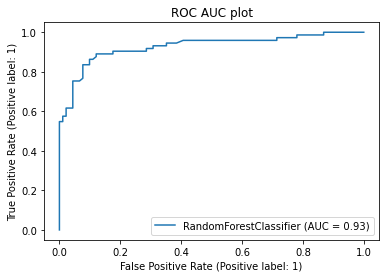

In [118]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [ ]:
# So, we are getting our model accuracy 86% and 
#  almost same cross-val-score which shows that 
# our model is performing "good enough".

# Saving the Model:-

In [119]:
import pickle
filename='Titanic_Survival.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [120]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
titanic_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
titanic_com

,original,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
159,1,0
160,1,1
161,0,0
162,0,0
